In [50]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib import animation
import scipy.linalg as linalg
import scipy.spatial as spat
import matplotlib.patches as patches
import matplotlib.colors as colors
from scipy.spatial.distance import cdist
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

import matplotlib.animation as manimation

import imageio
import matplotlib.cm as cm

In [24]:
core_coords = pd.read_csv('../COMSOL/Data/Spiral/data for paper/spiral coord locs.csv', skiprows=4)
display(core_coords)
x_coreds = core_coords.iloc[1,:].to_numpy()[1:]
y_coreds = core_coords.iloc[0,:].to_numpy()[1:]
combined_coords = np.stack((x_coreds, y_coreds), axis=1)
print(combined_coords)

,Unnamed: 0,Point 1,Point 2,Point 3,Point 4,Point 5,Point 6,Point 7,Point 8,Point 9,Point 10,Point 11,Point 12
0,y_coord,0,-7.534421,-15.068842,-15.068842,-7.534421,0.0,7.534421,15.068842,15.068842,15.068842,7.534421,0.0
1,x_coord,0,-4.350000,0.000000,8.700000,13.050000,17.4,13.050000,8.700000,0.000000,-8.700000,-13.050000,-17.4


[[0 0]
 [-4.35 -7.534421012999999]
 [0.0 -15.06884203]
 [8.7 -15.06884203]
 [13.05 -7.534421012999999]
 [17.4 0.0]
 [13.05 7.534421012999999]
 [8.7 15.06884203]
 [0.0 15.06884203]
 [-8.7 15.06884203]
 [-13.05 7.534421012999999]
 [-17.4 0.0]]


In [25]:

# Plotting betas
def plot_betas(beta_vals, coupling, point_label, xrange=[]):
    fig1  = plt.figure(figsize=(7,7))   
    ax1 = fig1.add_subplot(111)
    if type(beta_vals) == list:
        for i,vals in enumerate(beta_vals):
            ax1.scatter(np.arange(len(vals)), vals, label=point_label[i])

    else: 
        ax1.scatter(np.arange(len(beta_vals)), beta_vals-np.mean(beta_vals), label=point_label)
    ax1.grid(axis='x', which='both')
    ax1.set_ylabel(r'$ \beta$')
    ax1.set_xlabel('Mode Index')
    if len(xrange) == 2:
        ax1.set_xlim(xrange[0],xrange[1])
    plt.legend();

# For nice plotting of eigenvectors 
def plot_coloured_chain(intensities, circ_size, circ_locations, label):
    """
    
    """
    fig_chain = plt.figure(figsize=(5,5))
    ax_chain = fig_chain.add_subplot(111)
    intensities = intensities/np.sum(intensities)
    circ_list = []
    norm = colors.Normalize(vmin=0, vmax=max(np.real(intensities)))
    cmap = plt.cm.get_cmap('Reds')
    cmap(norm(np.real(intensities)))

    for j in range(len(intensities)):
        #print(intensities[j])
        circ_list.append(patches.Circle((circ_locations[j][0], circ_locations[j][1]), radius=circ_size//2,
                                            color=cmap(norm(np.real(intensities[j]))),ec='black')) 

#         ax_chain.annotate(str(j), (circ_locations[j][0], circ_locations[j][1]), color='black',
#                           fontsize=10, ha='center', va='center')
   
    # plt.axis('off')
    # Plot all circles
    for _circ in circ_list:
        ax_chain.add_patch(_circ)
    plt.title('Mode no. {:d}'.format(label), loc='left')
    plt.axis('scaled')
    plt.show()     
    return  


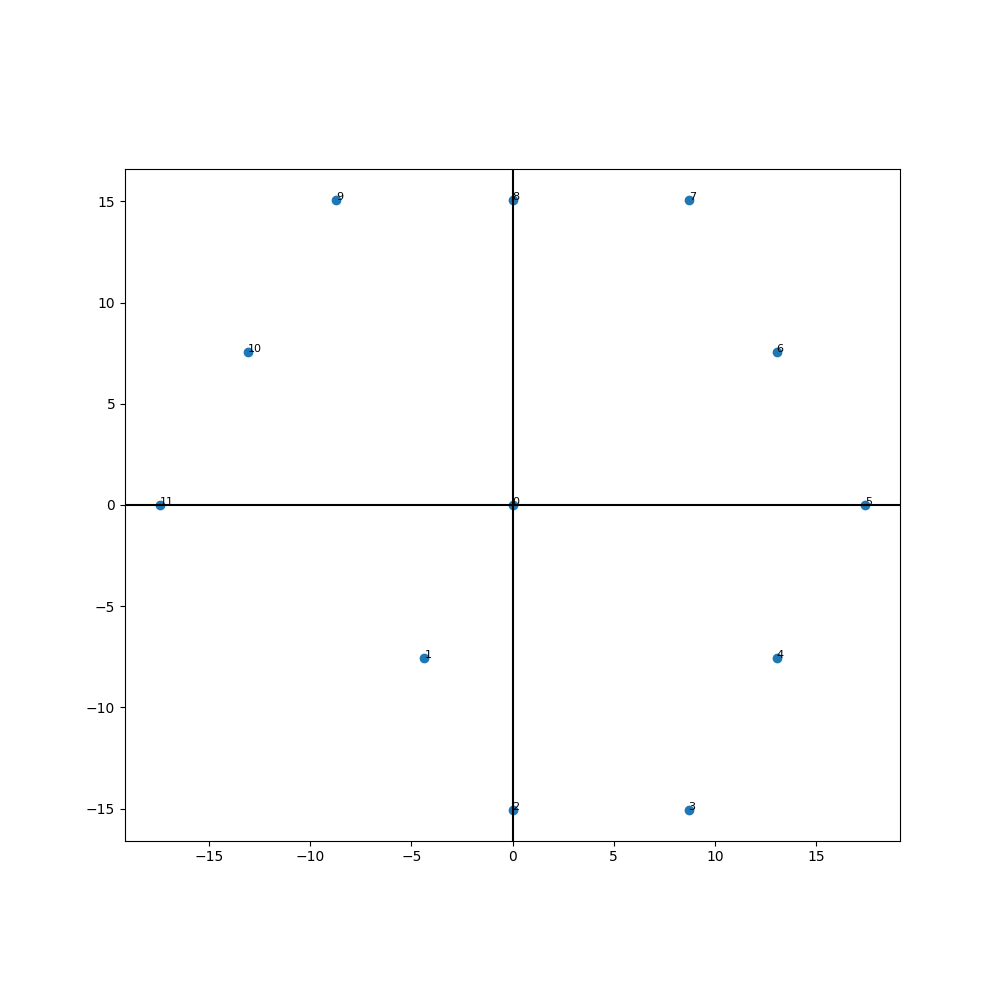

In [27]:

point_list = combined_coords
fig_plot = plt.figure(figsize=(10,10))
ax_plot = fig_plot.add_subplot(111)
ax_plot.axhline(0, color='black')
ax_plot.axvline(0, color='black')
ax_plot.scatter(point_list[:,0], point_list[:,1])
ax_plot.set_aspect('equal')
for i in range(len(point_list)):
    # print(i, coord)
    ax_plot.annotate(str(i), (point_list[i,0], point_list[i,1]), fontsize=8)
    # for k,val in enumerate(C_MATRIX[i,:]):
    #     if np.real(val) != 0:
    #         ax_plot.arrow(point_list[i,0], point_list[i,1], point_list[k,0] - point_list[i,0] , point_list[k,1] - point_list[i,1], fc='red',ec='red' )
    #     elif np.imag(val) !=0:
    #         ax_plot.arrow(point_list[i,0], point_list[i,1], point_list[k,0] - point_list[i,0] , point_list[k,1] - point_list[i,1], fc='blue',ec='blue' )

# print(len(point_list))
# fig_plot.savefig('haldane couplings.png', dpi=300)
plt.show()

In [ ]:
# def onclick(event):
#     pos.append([event.xdata,event.ydata])

# pos = []

# fig1 = plt.figure(figsize=(9,6))
# ax1 = fig1.add_subplot(111)

# ax1.scatter(point_list[:,0], point_list[:,1], cmap='Reds')
# ax1.xaxis.set_major_locator(MultipleLocator(10))
# ax1.xaxis.set_minor_locator(MultipleLocator(5))
# ax1.yaxis.set_major_locator(MultipleLocator(10))
# ax1.yaxis.set_minor_locator(MultipleLocator(5))
# #ax1.xaxis.set_major_formatter({x:.0f})
# plt.grid(which='both')

# fig1.canvas.mpl_connect('button_press_event', onclick)
# plt.show()

In [28]:
# pos = np.array(pos)
# points_to_keep = np.where(cdist(point_list, pos, 'euclidean')>2, False, True )
# index_to_keep = np.invert(np.any(points_to_keep, axis=1))
# deformed_lattice= point_list[index_to_keep]

In [29]:
# fig_deformed_lattice_plot = plt.figure(figsize=(6,6))
# ax_deformed_lattice_plot = fig_deformed_lattice_plot.add_subplot(111)
# ax_deformed_lattice_plot.axhline(0, color='black')
# ax_deformed_lattice_plot.axvline(0, color='black')
# ax_deformed_lattice_plot.scatter(deformed_lattice[:,0], deformed_lattice[:,1])
# ax_deformed_lattice_plot.set_aspect('equal')
# for i in range(len(deformed_lattice)):
#     # print(i, coord)
#     ax_deformed_lattice_plot.annotate(str(i), (deformed_lattice[i,0], deformed_lattice[i,1]), fontsize=8)
# # print(len(b_10_list))


In [30]:
def loop_FD_NL(coupling_matrix, number_of_steps, initial_state, step_size, nl_gamma):
    phis = np.zeros((np.shape(coupling_matrix)[0], number_of_steps), dtype=np.complex128)
    phis[:,0] = initial_state
    for i in np.arange(1,number_of_steps):
        phis[:,i] = phis[:,i-1] + 1.0j * coupling_matrix@phis[:,i-1] * step_size + 1.0j*step_size*2*nl_gamma*np.vdot(phis[:,i-1], phis[:,i-1])*phis[:,i-1]
        # print(phis[:,i])
    return phis

In [58]:
def loop_FD(coupling_matrix, number_of_steps, initial_state, step_size):
    phis = np.zeros((np.shape(coupling_matrix)[0], number_of_steps), dtype=np.complex128)
    phis[:,0] = initial_state
    for i in np.arange(1,number_of_steps):
        phis[:,i] = phis[:,i-1] + 1.0j * coupling_matrix@phis[:,i-1] * step_size 
        # print(phis[:,i])
    return phis

In [59]:
def build_twelve_core_chain(w,v):
    h = np.array([[0,w,0,0,0,0,0,0,0,0,0,0],
                 [w,0,v,0,0,0,0,0,0,0,0,0],
                 [0,v,0,w,0,0,0,0,0,0,0,0],
                 [0,0,w,0,v,0,0,0,0,0,0,0],
                 [0,0,0,v,0,w,0,0,0,0,0,0],
                 [0,0,0,0,w,0,v,0,0,0,0,0],
                 [0,0,0,0,0,v,0,w,0,0,0,0],
                 [0,0,0,0,0,0,w,0,v,0,0,0],
                 [0,0,0,0,0,0,0,v,0,w,0,0],
                 [0,0,0,0,0,0,0,0,w,0,v,0],
                 [0,0,0,0,0,0,0,0,0,v,0,w],
                 [0,0,0,0,0,0,0,0,0,0,w,0]])   
    return h 

In [81]:
C_Matrix_ssh = build_twelve_core_chain(160, 360)
init_excitation = np.zeros(np.shape(C_Matrix_ssh)[0], dtype=np.complex128)
init_excitation[0] = 10 #-1.0j
delta_z = 0.00001

<ipython-input-25-6eafd502b016>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig_chain = plt.figure(figsize=(5,5))


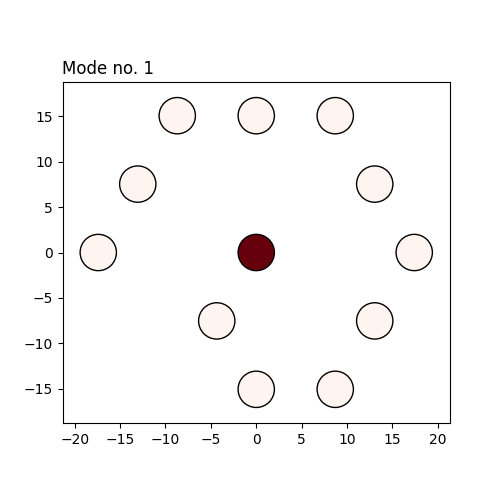

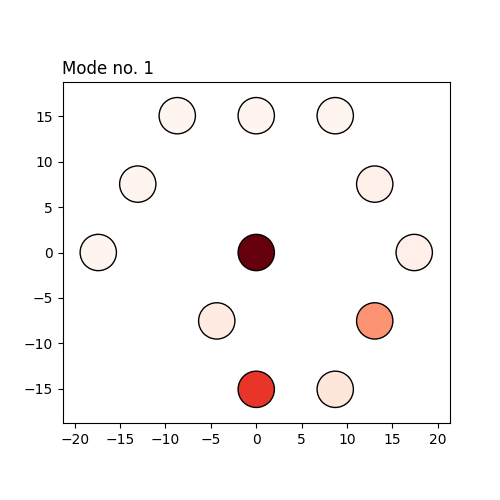

In [82]:
phi_mat = loop_FD_NL(C_Matrix_ssh, 1000, init_excitation, delta_z, 18e-2)
phi_mat_lin = loop_FD(C_Matrix_ssh, 1000, init_excitation, delta_z)

intensity_to_plot = phi_mat*np.conjugate(phi_mat) / np.sum(phi_mat*np.conjugate(phi_mat), axis=0)
intensity_to_plot_lin = phi_mat*np.conjugate(phi_mat) / np.sum(phi_mat*np.conjugate(phi_mat), axis=0)

plot_coloured_chain(intensity_to_plot[:,0], 4, combined_coords, 1)
plot_coloured_chain(intensity_to_plot[:,-1], 4, combined_coords, 1)
# plot_coloured_chain(init_int_end, 4, point_list, 1)

In [83]:
intensity_diff = intensity_to_plot_lin - intensity_to_plot
print(np.where(intensity_diff>0.0))


(array([], dtype=int64), array([], dtype=int64))


In [54]:
def make_video(coord_list, intensities, fname, frame_no):
    fig = plt.figure()
    fig.set_dpi(400)
    fig.set_size_inches(10, 10)

    radius = 2.0
    x_y_max = np.max(coord_list, axis=0)+radius*2
    ax = plt.axes(xlim=(-x_y_max[0], x_y_max[0]), ylim=(-x_y_max[0], +x_y_max[0]))

    patch_list = []
    for j in range(len(coord_list)):
        patch_list.append(patches.Circle((coord_list[j][0], coord_list[j][1]), radius=radius)) 

    def init():
        for j in range(len(patch_list)):
            patch_list[j].center = (coord_list[j][0], coord_list[j][1])
            patch_list[j].set_edgecolor('black')
            patch_list[j].set_facecolor('White')
            ax.add_patch(patch_list[j])
        return patch_list,

    def animate(i):
        norm = colors.Normalize(vmin=0, vmax=np.max(np.real(intensities[:,i])))
        cmap = plt.cm.get_cmap('Reds')
        for j in range(len(patch_list)):
            patch_list[j].set_edgecolor('black')
            patch_list[j].set_facecolor(cmap(norm(np.real(intensities[j,i]))))
        return patch_list,

    anim = animation.FuncAnimation(fig, animate, 
                                init_func=init, 
                                frames=frame_no, 
                                interval=1,
                                blit=False,
                                save_count=frame_no,
                                repeat=True)
    writervideo = animation.FFMpegWriter(fps=60)
    
    plt.axis('off')
    anim.save('../Propagation Videos/'+fname, writer=writervideo)
    
    plt.close()
# plt.show()
    return 

In [62]:
make_video(combined_coords, intensity_to_plot, 'SSH chain edge mode with nonlinear term.mp4', 1000)

In [63]:
make_video(combined_coords, intensity_to_plot_lin, 'SSH chain edge mode propagation.mp4', 1000)

In [65]:
make_video(combined_coords, intensity_diff, 'SSH chain edge edge mode nonlinear difference.mp4', 1000)